# Python from Zero: The absolute Beginner's course

## Session 4 / 4 - 24.02.2022 9:00 - 13:00
<br>
<font size="3">
    <i>by Fabian Wilde, Katharina Hoff, Matthis Ebel & Mario Stanke<br></i><br>
<b>Contact:</b> matthis.ebel@uni-greifswald.de
<br>
</font>
<br>

# The library Pandas

<br>
<font size="3">
Neither NumPy arrays, nor any of the native Python data structures (e.g. lists, dicts, ...) are suitable to handle the data that is typically generated in scientific experiments or by surveys. These are typically tables where one column contains one data type, but different columns may have different data types. The solution in Python is to use Pandas (https://pandas.pydata.org/). Pandas is also most popular for time series data.
<br><br>
If we want to use Pandas, we have to import it:
</font>

In [3]:
import pandas as pd

<font size="3">
With Pandas, we can easily import a csv file that had previously been exported from LibreOffice Calc (or similar Office software):
</font>

In [4]:
melon = pd.read_csv('data/melon.csv', sep='\t')
melon

,variety,yield
0,A,25.12
1,A,17.25
2,A,26.42
3,A,16.08
4,A,22.15
5,A,15.92
6,B,40.25
7,B,35.25
8,B,31.98
9,B,36.52


<font size="3">We can play with accessing parts of the melon data set:</font>

In [7]:
print("access lines 1 and 2, all columns:")
# line index is 0-based
print(melon.iloc[1:3,:])

print("access a particular single value as scalar:")
print(melon.iloc[1,1])

print("access a column by name (only first couple of lines):")
print(melon["variety"].head())

# like in Numpy we can also use comparisons in Pandas when elements are addressed
print("find parts of dataframe where yield >37:")
#print(melon['yield'] > 37)
print(melon[melon['variety'] == 'D'])

# count the number of occurrences of this variety
print(melon[melon["variety"] == "C"].count())

# group-by functionality facilitates analyses
print(melon.groupby("variety").mean())

access lines 1 and 2, all columns:
  variety  yield
1       A  17.25
2       A  26.42
access a particular single value as scalar:
17.25
access a column by name (only first couple of lines):
0    A
1    A
2    A
3    A
4    A
Name: variety, dtype: object
find parts of dataframe where yield >37:
   variety  yield
18       D  28.55
19       D  28.05
20       D  33.20
21       D  31.68
22       D  30.32
23       D  27.58
variety    6
yield      6
dtype: int64
             yield
variety           
A        20.490000
B        37.403333
C        19.491667
D        29.896667


<font size="3">Table-like data in Pandas is stored in DataFrame objects, as we can see, when we check the datatype of our melon dataset:</font>

In [7]:
print(type(melon))

<class 'pandas.core.frame.DataFrame'>


<font size="3">A DataFrame can also be created manually from one or more lists or numpy arrays:</font>

In [10]:
# You can define a name for each column with the parameter columns
# The special thing about Pandas is now that one column can also be defined as index or can
# be explicitly defined. Indexation is a key feature of big databases to speed-up queries.b
df = pd.DataFrame([123,23,54,15,89], columns=["numbers"], index=["a","b","c","d","e"])
df

,numbers
a,123
b,23
c,54
d,15
e,89


<font size="3">A Pandas DataFrame object also has useful attributes like index and columns:</font>

In [12]:
print(df.index)
print(df.columns)
print(df.dtypes)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Index(['numbers'], dtype='object')
numbers    int64
dtype: object


<font size="3">Once defined, a DataFrame can be enlarged as well by other columns even if the columns contain a different data type:</font>

In [16]:
df['floats'] = [1.23, 5.67, 4.31, 6.89, 5.34]
df['names'] = ['Marco', 'Alex', 'John', 'Michael', 'Alistair']
df

,numbers,floats,names
a,123,1.23,Marco
b,23,5.67,Alex
c,54,4.31,John
d,15,6.89,Michael
e,89,5.34,Alistair


In [14]:
print(df.dtypes)

numbers      int64
floats     float64
names       object
dtype: object


<font size="3">Or we simply add a new row with data providing a new DataFrame, but once an index has been defined, we need to make sure to provide then index values as well:</font>

In [22]:
df.append(pd.DataFrame({'numbers': 273, 'floats': 8.98, 'names': "Florian"}, index=['f']))

,numbers,floats,names
a,123,1.23,Marco
b,23,5.67,Alex
c,54,4.31,John
d,15,6.89,Michael
e,89,5.34,Alistair
f,273,8.98,Florian


<font size="3">The index of a Pandas DataFrame can also be a timestamp which is useful for time series data. Pandas also has some useful built-in plotting functionality. As example, we load the dataset of the DAX share price index and plot it using Pandas:</font>

<font size="3">We need to install a new package first:</font>

In [23]:
! pip install pandas-datareader

<font size="3">Then we need to import the new module and download the data:</font>

In [30]:
# imports a function to download price data from the web
from pandas_datareader import DataReader
dax = DataReader(name='^GDAXI', data_source="yahoo", start='2000-1-1')
# only returns the first N rows of the data table
dax.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,7159.330078,6720.870117,6961.720215,6750.759766,43072500.0,6750.759766
2000-01-04,6755.359863,6510.459961,6747.240234,6586.950195,46678400.0,6586.950195
2000-01-05,6585.850098,6388.910156,6585.850098,6502.069824,52682800.0,6502.069824
2000-01-06,6539.310059,6402.629883,6501.450195,6474.919922,41180600.0,6474.919922
2000-01-07,6791.529785,6470.140137,6489.939941,6780.959961,56058900.0,6780.959961


In [32]:
# gives the total number of values in the table
print(dax.size)
# gives the number of rows x columns in the table
print(dax.shape)
# gives a complete summary of the table (size, data types)
print(dax.info)

32868
(5478, 6)
<bound method DataFrame.info of                     High           Low          Open         Close  \
Date                                                                 
2000-01-03   7159.330078   6720.870117   6961.720215   6750.759766   
2000-01-04   6755.359863   6510.459961   6747.240234   6586.950195   
2000-01-05   6585.850098   6388.910156   6585.850098   6502.069824   
2000-01-06   6539.310059   6402.629883   6501.450195   6474.919922   
2000-01-07   6791.529785   6470.140137   6489.939941   6780.959961   
...                  ...           ...           ...           ...   
2021-07-30  15613.660156  15440.889648  15493.740234  15544.389648   
2021-08-02  15702.889648  15511.250000  15631.700195  15568.730469   
2021-08-03  15608.070312  15492.580078  15537.690430  15555.080078   
2021-08-04  15712.269531  15600.799805  15653.650391  15692.129883   
2021-08-05  15696.679688  15672.269531  15653.650391  15679.299805   

                Volume     Adj Close  
Da

<font size="3">We can directly plot now out of Pandas:</font>

<AxesSubplot:xlabel='Date'>

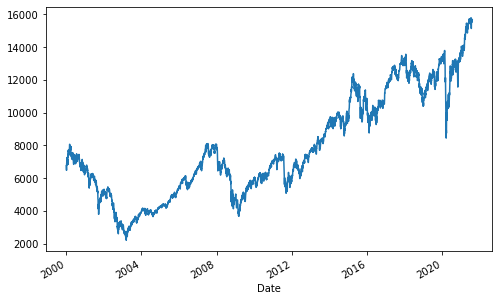

In [28]:
dax["Close"].plot(figsize=(8,5))

## Usage of Python in Ecology

<br>
<font size="3">
Python offers a variety of possible applications in the field of ecology, even dedicated libraries with data analysis and plotting functionality especially for ecology: <br>
<ul>
    <li><a href="https://ecopy.readthedocs.io/en/latest/">EcoPy</a>:<br>EcoPy contains numerous numerical and statistical techniques for working with and analyzing multivariate data. Although designed with ecologists in mind, many of the functions and features are widely applicable.</li><br>
    <li><a href="https://github.com/datacarpentry/python-ecology-lesson">Data Carpentry Lessons with Ecological Data</a>:<br>Course materials of a Python workshop especially for Ecologists</li><br>
    <li><a href="https://towardsdatascience.com/creating-the-ecology-classic-kite-diagram-in-python-46989e1310ad">Creating the classic Kite diagram in Python</a><br>
</ul>
</font>